### Load the data from Excel

In [1]:
import pandas as pd
import numpy as np
import cmdstanpy as c
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
#c.install_cmdstan()
print(c.__version__)

1.1.0


In [2]:

f = pd.ExcelFile( "../data/Cumulus Expansion dataset_without_negative_CE_values.xlsx")                                                  
print(f.sheet_names)
dfs = {}
for sheet_name in f.sheet_names:
    dfs[sheet_name] = pd.read_excel(f, sheet_name, skiprows=[0,1], header=None,usecols=[1,2,3,4,5,6])

['Area method', '3distance method', 'Score method']


In [3]:
dfs['Area method']


,1,2,3,4,5,6
0,178.072184,190.503002,178.518719,170.957529,194.124455,180.524075
1,110.545249,109.025768,112.780247,108.246239,117.683475,99.680823
2,61.779680,63.414298,76.387161,70.105727,69.782141,75.691881
3,35.756752,74.652821,64.172850,47.696356,58.703652,65.581084
4,7.413434,43.492802,34.984445,29.277502,37.427337,32.186628
...,...,...,...,...,...,...
227,141.696152,142.336361,233.908814,121.368418,144.086331,260.232729
228,53.737893,47.563056,58.645541,34.494464,42.131194,62.355879
229,81.012607,72.006168,76.574489,73.516026,67.435111,81.598661
230,132.129189,139.583314,124.941917,126.100468,145.678629,155.866156


In [4]:
def get_q(v):
    return np.log((v+100)/100)

def get_matrix(xls_df, judges=3, repeats=2, do_log=True):
    objects = len(xls_df.index)
    x = np.zeros((objects, judges, repeats))
    x[:,0,0] = xls_df[1]
    x[:,0,1] = xls_df[4]
    x[:,1,0] = xls_df[2]
    x[:,1,1] = xls_df[5]
    x[:,2,0] = xls_df[3]
    x[:,2,1] = xls_df[6]
    if do_log:
        x = get_q(x)
    return x

In [5]:
area = get_matrix(dfs['Area method'], do_log=False)
area_m = (area+100)/100

In [6]:
d3 = get_matrix(dfs['3distance method'], do_log=False)
d3_m = (d3+100)/100

In [7]:
score = get_matrix(dfs['Score method'], do_log=False)

In [8]:
def describe_data(x):
    x = x[~np.isnan(x)]
    x_min = np.min(x)
    x_max = np.max(x)
    print("Observations are in the range :[", x_min,"-", x_max,"]")
    x_mean = np.mean(x)
    x_median = np.median(x)
    print("And their mean is ", x_mean, " and their median is ", x_median)
    percentiles = np.percentile(x, [10 ,90])
    print("The interquartile range is: [Q10-Q90]: [",percentiles[0],"-",percentiles[1],"]")
    percentiles2 = np.percentile(x, [25 ,75])
    print("The interquartile range is: [Q25-Q75]: [",percentiles2[0],"-",percentiles2[1],"]")
    x_var = np.var(x)
    print("The variance of x is ", x_var, " and its square root is ", np.std(x))
    sns.displot(x.flatten())
    return {"l_mu":x_min, "u_mu":x_max}


Area method

Observations are in the range :[ 0.06569786825126003 - 346.268195683231 ]
And their mean is  84.89637512456285  and their median is  74.28408202840293
The interquartile range is: [Q10-Q90]: [ 31.014509404192378 - 154.2128869671484 ]
The interquartile range is: [Q25-Q75]: [ 49.79156358755021 - 105.54550894600301 ]
The variance of x is  2683.6574292313685  and its square root is  51.804029082990915


/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):



3 distances method

Observations are in the range :[ 0.15324588195828426 - 353.9398240535147 ]
And their mean is  57.83228282536199  and their median is  52.683478252630636
The interquartile range is: [Q10-Q90]: [ 15.288779793828406 - 106.12346442752742 ]
The interquartile range is: [Q25-Q75]: [ 30.809976963299427 - 77.55390979874119 ]
The variance of x is  1457.2492070787805  and its square root is  38.17393360761739

Score method

Observations are in the range :[ 0.0 - 4.0 ]
And their mean is  2.4123563218390807  and their median is  3.0
The interquartile range is: [Q10-Q90]: [ 1.0 - 3.0 ]
The interquartile range is: [Q25-Q75]: [ 2.0 - 3.0 ]
The variance of x is  0.827088700620954  and its square root is  0.9094441712501949


/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[0. 1. 2. 3. 4.] [ 21 213 460 567 131]


/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cerquide/prj/cumulus_expansion_variance_analysis/.venv/lib/python3.11/site-packages/s

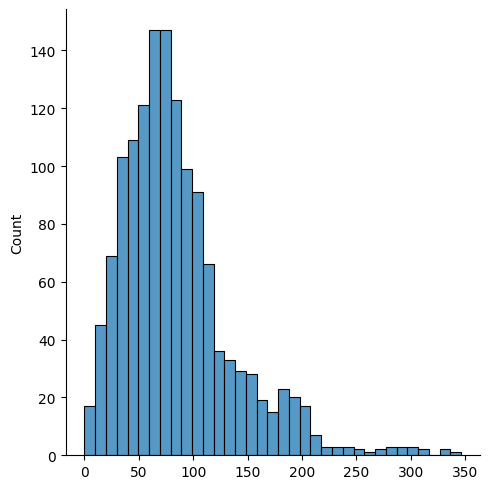

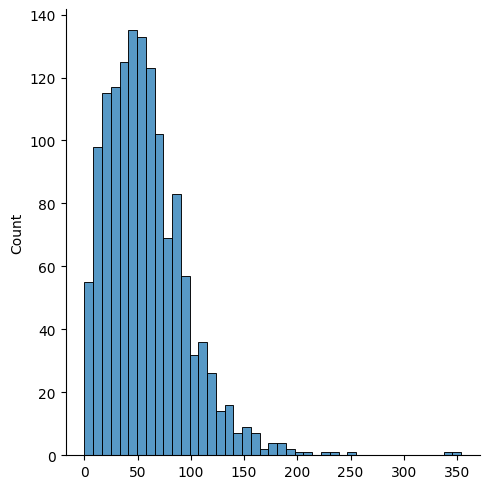

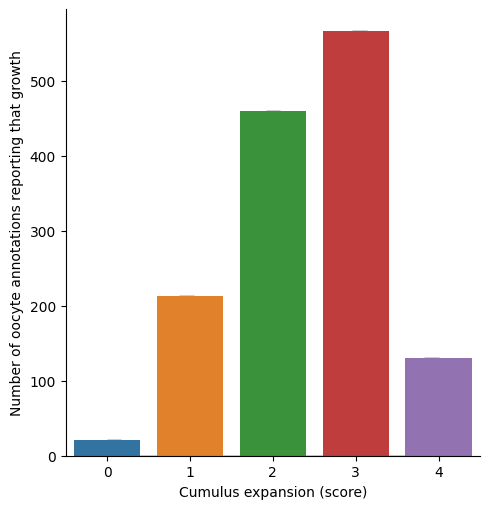

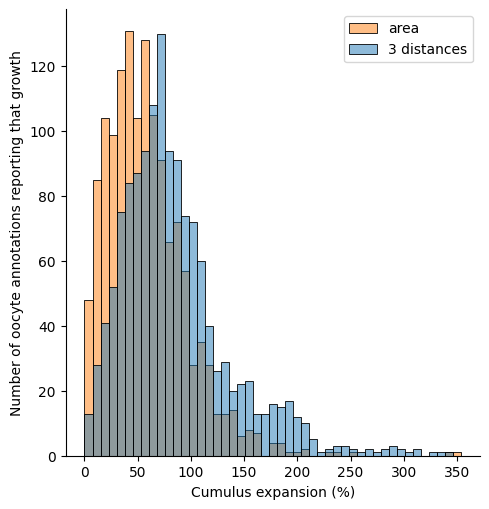

In [9]:
print("\nArea method\n")
describe_data(area)
print("\n3 distances method\n")
describe_data(d3)
print("\nScore method\n")
describe_data(score)
a, b = np.unique(score.flatten(),return_counts=True)
print (a, b)
a=a.astype(int)
sns.barplot(x=a, y=b)
plt.xlabel("Cumulus expansion (score)")
plt.ylabel("Number of oocyte annotations reporting that growth")
plt.savefig("../figs/ScoreHistogram.png",dpi=300.)
f = sns.displot({"Score":area.flatten(), "3 distances":d3.flatten()}, legend=False)
print(f)
plt.legend(["area","3 distances"])
plt.savefig("../figs/AreaAnd3DHistogram.png",dpi=300.)
plt.xlabel("Cumulus expansion (%)")
plt.ylabel("Number of oocyte annotations reporting that growth")
plt.show()

In [27]:
def compute_kappas(method):
    x = get_matrix(dfs[method],do_log=False)
    N, J, R = x.shape
    judges = np.zeros(N*J)
    for i in range(J):
        judges[N*i:N*(i+1)]=i
    indexes = np.tile(np.arange(N),J)
    df_inter = pd.DataFrame({'oocyte':indexes,'measurer':judges})
    CI_low_inter = np.zeros(R)
    CI_high_inter = np.zeros(R)
    ICC_inter = np.zeros(R)
    p_val = np.zeros(R)
    for i in range(R):
        col_name = "r"+str(i)
        df_inter[col_name] = x[:,:,i].swapaxes(0,1).flatten()
        icc = pg.intraclass_corr(data=df_inter, targets='oocyte', raters='measurer', ratings=col_name, nan_policy="omit")
        icc = icc.set_index('Type')
        print("Inter expert ICCs for method " + method + " and measurement repetition "+str(i))
        print("ICC:",icc.loc["ICC2"]["ICC"]," CI95%:",icc.loc["ICC2"]["CI95%"], ", p value=",icc.loc["ICC2"]["pval"])
        ICC_inter[i]=icc.loc["ICC2"]["ICC"]
        CI_low_inter[i] = float(icc.loc["ICC2"]["CI95%"][0])
        CI_high_inter[i] = float(icc.loc["ICC2"]["CI95%"][1])
        p_val[i] = float(icc.loc["ICC2"]["pval"])
    print("Inter expert Mean ICC for method " + method + ":",np.mean(ICC_inter)," CI95%: [", np.mean(CI_low_inter), " ", np.mean(CI_high_inter) ,"], p value=",p_val)
    reps = np.zeros(N*R)
    for i in range(R):
        reps[N*i:N*(i+1)]=i
    indexesr = np.tile(np.arange(N),R)
    df_intra = pd.DataFrame({'oocyte':indexesr,'rep':reps})
    CI_low_intra = np.zeros(J)
    CI_high_intra = np.zeros(J)
    ICC_intra = np.zeros(J)
    p_val = np.zeros(J)
    for i in range(J):
        col_name = "a"+str(i)
        df_intra[col_name] = x[:,i,:].swapaxes(0,1).flatten()
        icc = pg.intraclass_corr(data=df_intra, targets='oocyte', raters='rep', ratings=col_name, nan_policy="omit")
        icc = icc.set_index('Type')
        print("Intra expert ICCs for method " + method + " and observer "+str(i))
        _type="ICC1"
        print("ICC :",_type,icc.loc[_type]["ICC"]," CI95%:",icc.loc[_type]["CI95%"],", p value=",icc.loc["ICC1"]["pval"] )
        #for _type in ["ICC1", "ICC2", "ICC3"]:
        #    print("ICC :",_type,icc.loc[_type]["ICC"]," CI95%:",icc.loc[_type]["CI95%"])
        ICC_intra[i]=icc.loc["ICC1"]["ICC"]
        CI_low_intra[i] = float(icc.loc["ICC1"]["CI95%"][0])
        CI_high_intra[i] = float(icc.loc["ICC1"]["CI95%"][1])
        p_val[i] = float(icc.loc["ICC1"]["pval"])
    print("Intra expert Mean ICC for method " + method + ":",np.mean(ICC_intra)," CI95%: [", np.mean(CI_low_intra), " ", np.mean(CI_high_intra) ,"], p value=",p_val )    
    return ICC_inter, CI_low_inter, CI_high_inter, ICC_intra, CI_low_intra, CI_high_intra
    

In [28]:
iccs = {}
iccs["area"] = compute_kappas("Area method")
iccs["3 distance"] = compute_kappas('3distance method')
iccs["score"] = compute_kappas('Score method')

Inter expert ICCs for method Area method and measurement repetition 0
ICC: 0.8983412277233852  CI95%: [0.88 0.92] , p value= 2.8539343086429037e-180
Inter expert ICCs for method Area method and measurement repetition 1
ICC: 0.9013158761784912  CI95%: [0.85 0.93] , p value= 2.8619446478435914e-203
Inter expert Mean ICC for method Area method: 0.8998285519509381  CI95%: [ 0.865   0.925 ], p value= [2.85393431e-180 2.86194465e-203]
Intra expert ICCs for method Area method and observer 0
ICC : ICC1 0.8724820315381185  CI95%: [0.84 0.9 ] , p value= 2.3777462701532934e-74
Intra expert ICCs for method Area method and observer 1
ICC : ICC1 0.9008245838189646  CI95%: [0.87 0.92] , p value= 2.8755766161567802e-86
Intra expert ICCs for method Area method and observer 2
ICC : ICC1 0.963238813279916  CI95%: [0.95 0.97] , p value= 1.1650577247296783e-134
Intra expert Mean ICC for method Area method: 0.9121818095456664  CI95%: [ 0.8866666666666667   0.93 ], p value= [2.37774627e-074 2.87557662e-086 1

Mean ICCS (area, 3 distance, score): [0.8998285519509381, 0.5420722063860584, 0.3095538363352552]
Low 95% CI (area, 3 distance, score): [0.85, 0.44, 0.12]
High 95% CI (area, 3 distance, score): [0.93, 0.63, 0.47]


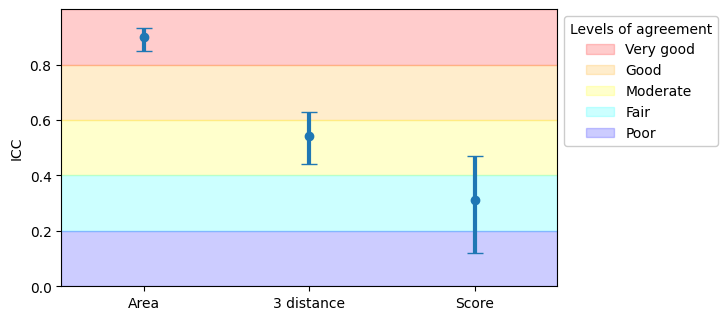

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.transforms import Bbox

x = ["Area", "3 distance", "Score"]

y = [np.mean(iccs["area"][0]), np.mean(iccs["3 distance"][0]), np.mean(iccs["score"][0])]
print("Mean ICCS (area, 3 distance, score):",y)
lowers = [np.min(iccs["area"][1]), np.min(iccs["3 distance"][1]), np.min(iccs["score"][1])]
print("Low 95% CI (area, 3 distance, score):", lowers)
uppers = [np.max(iccs["area"][2]), np.max(iccs["3 distance"][2]), np.max(iccs["score"][2])]
print("High 95% CI (area, 3 distance, score):", uppers)
lowers = [y[0] - lowers[0], y[1] - lowers[1], y[2] - lowers[2]]
uppers = [uppers[0]-y[0], uppers[1]-y[1], uppers[2]-y[2]]
yerr = [lowers,uppers]

plt.rcParams["figure.figsize"] = [16*0.4,9*0.4]
# plot:
fig, ax = plt.subplots()
#fig.figsize=(3,4)
ax.set_ylabel("ICC")
ax.errorbar(x, y, yerr, fmt='o', linewidth=3, capsize=6)
#ax.set_title("Inter expert agreement for the Area, 3 distance and Score methods")
ax.set(xlim=(-0.5, 2.5), xticks=np.arange(0, 3),
       ylim=(0, 1), yticks=np.arange(0,1,0.2 ))
r1=Rectangle((-0.5, 0.8), 3, 0.2, color="red", alpha=0.2)
r2=Rectangle((-0.5, 0.6), 3, 0.2, color="orange", alpha=0.2)
r3=Rectangle((-0.5, 0.4), 3, 0.2, color="yellow", alpha=0.2)
r4=Rectangle((-0.5, 0.2), 3, 0.2, color="cyan", alpha=0.2)
r5=Rectangle((-0.5, 0.), 3, 0.2, color="blue", alpha=0.2)
ax.add_patch(r1)
ax.add_patch(r2)
ax.add_patch(r3)
ax.add_patch(r4)
ax.add_patch(r5)
ax.legend([r1, r2, r3,r4,r5], ['Very good', 'Good', 'Moderate','Fair','Poor'], title="Levels of agreement", framealpha=1, bbox_to_anchor=(1., 1.))
plt.savefig("../figs/inter_expert_agreement.png",dpi=300.,bbox_inches=Bbox.from_extents(-0.5,-1,8,5))
plt.show()


[ 0.84  0.87  0.95  0.53  0.5   0.56  0.63 -0.01  0.41]
[0.9  0.92 0.97 0.69 0.67 0.71 0.76 0.24 0.6 ]


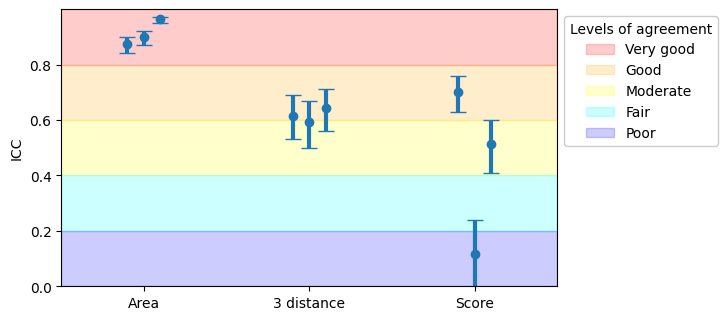

In [13]:
x = [-0.1,0.,0.1,0.9,1.,1.1,1.9,2,2.1]
y = np.hstack((iccs["area"][3], iccs["3 distance"][3], iccs["score"][3]))
lowers = np.hstack((iccs["area"][4], iccs["3 distance"][4], iccs["score"][4]))
print(lowers)
lowers = y-lowers
uppers = np.hstack((iccs["area"][5], iccs["3 distance"][5], iccs["score"][5]))
print(uppers)
uppers = uppers-y
yerr = [lowers,uppers]

plt.rcParams["figure.figsize"] = [16*0.4,9*0.4]
# plot:
fig, ax = plt.subplots()
#fig.figsize=(3,4)
ax.set_ylabel("ICC")
ax.errorbar(x, y, yerr, fmt='o', linewidth=3, capsize=6)
#ax.set_title("Intra expert agreement for each of the three annotators\n when using the Area, 3 distance and Score methods")
ax.set(xlim=(-0.5, 2.5), ylim=(0, 1), yticks=np.arange(0,1,0.2 ))
ax.set_xticks(np.arange(0, 3),["Area","3 distance","Score"])
r1=Rectangle((-0.5, 0.8), 3, 0.2, color="red", alpha=0.2)
r2=Rectangle((-0.5, 0.6), 3, 0.2, color="orange", alpha=0.2)
r3=Rectangle((-0.5, 0.4), 3, 0.2, color="yellow", alpha=0.2)
r4=Rectangle((-0.5, 0.2), 3, 0.2, color="cyan", alpha=0.2)
r5=Rectangle((-0.5, 0.), 3, 0.2, color="blue", alpha=0.2)
ax.add_patch(r1)
ax.add_patch(r2)
ax.add_patch(r3)
ax.add_patch(r4)
ax.add_patch(r5)
ax.legend([r1, r2, r3,r4,r5], ['Very good', 'Good', 'Moderate','Fair','Poor'], title="Levels of agreement", framealpha=1, bbox_to_anchor=(1., 1.))
plt.savefig("../figs/intra_expert_agreement.png",dpi=300.,bbox_inches=Bbox.from_extents(-0.5,-1,8,5))
plt.show()


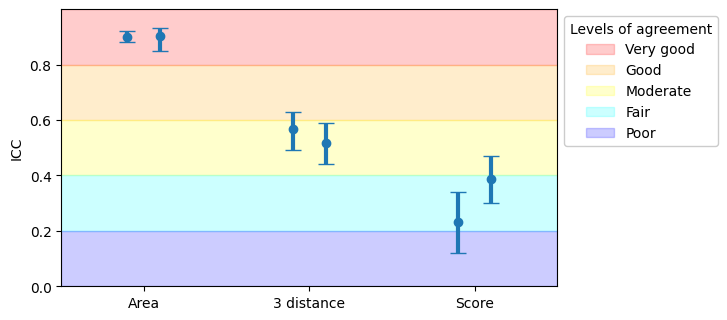

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.transforms import Bbox

#plt.style.use('_mpl-gallery')

# make data:
x = [-0.1,0.1,0.9,1.1,1.9,2.1]
#x = ["Area", "3 distance", "Score"]
y = np.hstack((iccs["area"][0], iccs["3 distance"][0], iccs["score"][0]))

lowers = np.hstack((iccs["area"][1], iccs["3 distance"][1], iccs["score"][1]))
lowers = y-lowers
uppers = np.hstack((iccs["area"][2], iccs["3 distance"][2], iccs["score"][2]))
uppers = uppers-y

yerr = [lowers,uppers]

plt.rcParams["figure.figsize"] = [16*0.4,9*0.4]
# plot:
fig, ax = plt.subplots()
#fig.figsize=(3,4)
ax.set_ylabel("ICC")
ax.errorbar(x, y, yerr, fmt='o', linewidth=3, capsize=6)
#ax.set_title("Inter expert agreement for the Area, 3 distance and Score methods")
r1=Rectangle((-0.5, 0.8), 3, 0.2, color="red", alpha=0.2)
r2=Rectangle((-0.5, 0.6), 3, 0.2, color="orange", alpha=0.2)
r3=Rectangle((-0.5, 0.4), 3, 0.2, color="yellow", alpha=0.2)
r4=Rectangle((-0.5, 0.2), 3, 0.2, color="cyan", alpha=0.2)
r5=Rectangle((-0.5, 0.), 3, 0.2, color="blue", alpha=0.2)
ax.set(xlim=(-0.5, 2.5), ylim=(0, 1), yticks=np.arange(0,1,0.2 ))
ax.set_xticks(np.arange(0, 3),["Area","3 distance","Score"])
ax.add_patch(r1)
ax.add_patch(r2)
ax.add_patch(r3)
ax.add_patch(r4)
ax.add_patch(r5)
ax.legend([r1, r2, r3,r4,r5], ['Very good', 'Good', 'Moderate','Fair','Poor'], title="Levels of agreement", framealpha=1, bbox_to_anchor=(1., 1.))
plt.savefig("../figs/inter_expert_agreement2.png",dpi=300.,bbox_inches=Bbox.from_extents(-0.5,-1,8,5))
plt.show()